In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy import stats
import matplotlib as mpl
import seaborn as sns
from IPython.display import HTML
%matplotlib inline
import sklearn


### Importing data

In [10]:
dataset = pd.read_csv("D:/Data Science/Lab2/AssurancExpertsInc.txt",delimiter = "\t")
print("datafrane shape : ", dataset.shape)
dataset.head()

datafrane shape :  (9822, 87)


,SD1,SD2,SD3,SD4,SD5,SD6,SD7,SD8,SD9,SD10,...,PO78,PO79,PO80,PO81,PO82,PO83,PO84,PO85,CLASS,STATUS
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,No,Learning
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,No,Learning
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,No,Learning
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,No,Learning
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,No,Learning


In [11]:
#get train dataset
train = dataset.loc[dataset["STATUS"] == "Learning", :]
print("train shape : ", train.shape)
train.head()

train shape :  (5822, 87)


,SD1,SD2,SD3,SD4,SD5,SD6,SD7,SD8,SD9,SD10,...,PO78,PO79,PO80,PO81,PO82,PO83,PO84,PO85,CLASS,STATUS
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,No,Learning
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,No,Learning
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,No,Learning
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,No,Learning
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,No,Learning


In [12]:
#get test dataset
test = dataset.loc[dataset["STATUS"] != "Learning"]
print("test shape : ", test.shape)
test.head()

test shape :  (4000, 87)


,SD1,SD2,SD3,SD4,SD5,SD6,SD7,SD8,SD9,SD10,...,PO78,PO79,PO80,PO81,PO82,PO83,PO84,PO85,CLASS,STATUS
5822,33,1,4,2,8,0,6,0,3,5,...,0,0,1,0,0,0,0,0,No,Test
5823,6,1,3,2,2,0,5,0,4,5,...,0,0,1,0,0,0,0,0,Yes,Test
5824,39,1,3,3,9,1,4,2,3,5,...,0,0,1,0,0,0,0,0,No,Test
5825,9,1,2,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,No,Test
5826,31,1,2,4,7,0,2,0,7,9,...,0,0,1,0,0,0,0,0,No,Test


In [13]:
#dropping STATUS column
dataset = dataset.drop(columns='STATUS', axis = 1)
train = train.drop(columns='STATUS', axis = 1)
test = test.drop(columns='STATUS', axis = 1)

### Exploring the data

#### Exploring CLASS variable distribuation

No     9236
Yes     586
Name: CLASS, dtype: int64


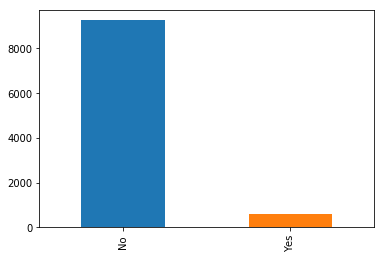

In [14]:
v_count = dataset["CLASS"].value_counts()
print(v_count)
v_count.plot(kind = "bar");

We can see that there are far more people not having a caravan insurance than those having one. 

#### Examining Missing Values

In [15]:
def missing_values_table(df):
    mis_values = df.isnull().sum()
    mis_values_percentage = mis_values/len(df) * 100
    mis_value_table = pd.concat([mis_values, mis_values_percentage], axis = 1)
    mis_value_table = mis_value_table.rename(columns = {0:"Missing Values", 1:"% Of Missing Values"})
    
    mis_value_table = mis_value_table[mis_value_table.iloc[:, 1] != 0].sort_values(
        "% Of Missing Values", ascending = False).round(1)
    
    print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_value_table.shape[0]) +
              " columns that have missing values.")
    return mis_value_table

In [16]:
miss_values = missing_values_table(train)

Dataframe has 86 columns.
There are 0 columns that have missing values.


#### Column Types

In [17]:
print(train.dtypes.value_counts())
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

int64     85
object     1
dtype: int64


CLASS    2
dtype: int64

All variables are of numerical type(integers) except for the target variable (CLASS) which will be encoded.

### Looking For Anomalies

#### Encoding CLASS variable

In [18]:
#Applying label encoding on CLASS variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(dataset["CLASS"])
dataset["CLASS"] = encoder.transform(dataset["CLASS"])


In [19]:
dataset.describe()

,SD1,SD2,SD3,SD4,SD5,SD6,SD7,SD8,SD9,SD10,...,PO77,PO78,PO79,PO80,PO81,PO82,PO83,PO84,PO85,CLASS
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.00000,2.000000,2.000000,1.000000


### Feature engineering

### Correlations

#### Identifying highly correlated variables

In [20]:
#threshold for removing highly correlated features
threshold = 0.8

#correlation matrix
crr = dataset.corr().abs()
crr.head()

,SD1,SD2,SD3,SD4,SD5,SD6,SD7,SD8,SD9,SD10,...,PO77,PO78,PO79,PO80,PO81,PO82,PO83,PO84,PO85,CLASS
SD1,1.000000,0.040328,0.006594,0.014428,0.992712,0.203087,0.092478,0.029237,0.016571,0.050488,...,0.021546,0.011611,0.000815,0.000469,0.005283,0.012901,0.025533,0.016336,0.043749,0.060742
SD2,0.040328,1.000000,0.004315,0.052448,0.048317,0.004304,0.031296,0.020160,0.018018,0.006801,...,0.003267,0.007011,0.012374,0.001343,0.007991,0.001384,0.012526,0.031936,0.005851,0.002836
SD3,0.006594,0.004315,1.000000,0.339942,0.029737,0.009383,0.053455,0.113296,0.010404,0.531272,...,0.002878,0.017853,0.019305,0.004668,0.003888,0.013174,0.018487,0.010928,0.030856,0.046224
SD4,0.014428,0.052448,0.339942,1.000000,0.009698,0.038454,0.091775,0.058412,0.114922,0.058155,...,0.020911,0.001029,0.001511,0.017606,0.004048,0.008401,0.018824,0.009157,0.012377,0.004227
SD5,0.992712,0.048317,0.029737,0.009698,1.000000,0.208057,0.100622,0.038340,0.018710,0.012349,...,0.022526,0.009087,0.002128,0.000024,0.003526,0.015422,0.027067,0.015549,0.041213,0.059306


In [21]:
# Upper triangle of correlations
upper = crr.where(np.triu(np.ones(crr.shape), k=1).astype(np.bool))
upper.head()

,SD1,SD2,SD3,SD4,SD5,SD6,SD7,SD8,SD9,SD10,...,PO77,PO78,PO79,PO80,PO81,PO82,PO83,PO84,PO85,CLASS
SD1,NaN,0.040328,0.006594,0.014428,0.992712,0.203087,0.092478,0.029237,0.016571,0.050488,...,0.021546,0.011611,0.000815,0.000469,0.005283,0.012901,0.025533,0.016336,0.043749,0.060742
SD2,NaN,NaN,0.004315,0.052448,0.048317,0.004304,0.031296,0.020160,0.018018,0.006801,...,0.003267,0.007011,0.012374,0.001343,0.007991,0.001384,0.012526,0.031936,0.005851,0.002836
SD3,NaN,NaN,NaN,0.339942,0.029737,0.009383,0.053455,0.113296,0.010404,0.531272,...,0.002878,0.017853,0.019305,0.004668,0.003888,0.013174,0.018487,0.010928,0.030856,0.046224
SD4,NaN,NaN,NaN,NaN,0.009698,0.038454,0.091775,0.058412,0.114922,0.058155,...,0.020911,0.001029,0.001511,0.017606,0.004048,0.008401,0.018824,0.009157,0.012377,0.004227
SD5,NaN,NaN,NaN,NaN,NaN,0.208057,0.100622,0.038340,0.018710,0.012349,...,0.022526,0.009087,0.002128,0.000024,0.003526,0.015422,0.027067,0.015549,0.041213,0.059306


In [22]:
#print highly correlated features
un_crr = upper.unstack()
pair_corr = un_crr[un_crr > threshold].drop_duplicates()
pair_corr

SD5   SD1     0.992712
SD12  SD10    0.883251
SD31  SD30    0.999625
SD36  SD35    0.999381
PO65  PO44    0.981097
PO66  PO45    0.906663
PO67  PO46    0.984484
PO68  PO47    0.907506
PO69  PO48    0.894309
PO70  PO49    0.923728
PO71  PO50    0.901122
PO72  PO51    0.962867
PO73  PO52    0.913831
PO74  PO53    0.908873
PO75  PO54    0.967662
PO76  PO55    0.852969
PO77  PO56    0.898726
PO78  PO57    0.979788
PO79  PO58    0.959882
PO80  PO59    0.869354
PO81  PO60    0.942761
PO82  PO61    0.894000
PO83  PO62    0.933068
PO84  PO63    0.865845
PO85  PO64    0.964774
dtype: float64

In [23]:
#variables correlation with CLASS variable
var_class_corr = crr['CLASS'].sort_values(ascending = False)
var_class_corr.head(15)

CLASS    1.000000
PO47     0.137053
PO68     0.126768
SD43     0.099018
PO44     0.098757
PO59     0.096709
PO65     0.091379
SD42     0.085122
SD18     0.084835
SD16     0.084373
PO82     0.082763
SD37     0.079035
PO61     0.075779
SD30     0.075743
SD31     0.075283
Name: CLASS, dtype: float64

In [24]:
#remove one of the two correlated variables which is the least correlated with the target variable
def get_toDrop_vars(var_list):
    to_drop = []
    for i in range(len(var_list)):
        nn = var_list.index[i]
        if nn in pair_corr:
            corr_nn_class = var_list[i]
            corr_nn_var = pair_corr[nn]
            if var_list[pair_corr[nn].index[0]] > corr_nn_class:
                to_drop.append(nn)
            else:
                to_drop.append(pair_corr[nn].index[0])

    return to_drop

In [25]:
to_drop = get_toDrop_vars(var_class_corr)

In [26]:
#drop columns
dataset = dataset.drop(columns=to_drop)

print(dataset.shape)

(9822, 61)


### Drop Zero importance feature 

In [27]:
import lightgbm as lgm

In [28]:
X_train, y_train = train.loc[:, train.columns.values != "CLASS"], train.loc[:, "CLASS"]

In [29]:
my_model = lgm.LGBMClassifier()
my_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [30]:
feature_importance = pd.DataFrame({'Feature':list(X_train.columns), 'Importance':my_model.feature_importances_})

In [31]:
#sort by feature importances
feature_importance = feature_importance.sort_values(ascending = False, by='Importance')

In [32]:
feature_importance.head(15)

,Feature,Importance
0,SD1,179
58,PO59,171
46,PO47,117
36,SD37,83
22,SD23,83
8,SD9,78
25,SD26,76
6,SD7,75
21,SD22,71
31,SD32,71


In [33]:
#get feature with 0 importance
zero_importance = feature_importance[feature_importance["Importance"] == 0]
zero_importance

,Feature,Importance
59,PO60,0
74,PO75,0
83,PO84,0
81,PO82,0
80,PO81,0
4,SD5,0
78,PO79,0
77,PO78,0
76,PO77,0
72,PO73,0


In [34]:
for i in zero_importance["Feature"]:
    for j in dataset.keys():
        if i ==j:
            dataset = dataset.drop(columns=j)
dataset.keys()


Index(['SD1', 'SD2', 'SD3', 'SD4', 'SD6', 'SD7', 'SD8', 'SD9', 'SD10', 'SD11',
       'SD13', 'SD14', 'SD15', 'SD16', 'SD17', 'SD18', 'SD19', 'SD20', 'SD21',
       'SD22', 'SD23', 'SD24', 'SD25', 'SD26', 'SD27', 'SD28', 'SD29', 'SD30',
       'SD32', 'SD33', 'SD34', 'SD35', 'SD37', 'SD38', 'SD39', 'SD40', 'SD41',
       'SD42', 'SD43', 'PO44', 'PO45', 'PO47', 'PO51', 'PO54', 'PO56', 'PO57',
       'PO58', 'PO59', 'PO64', 'PO76', 'PO83', 'CLASS'],
      dtype='object')

### Exploring sociodemographic variables

#### Purchased caravan policy vs social's classes

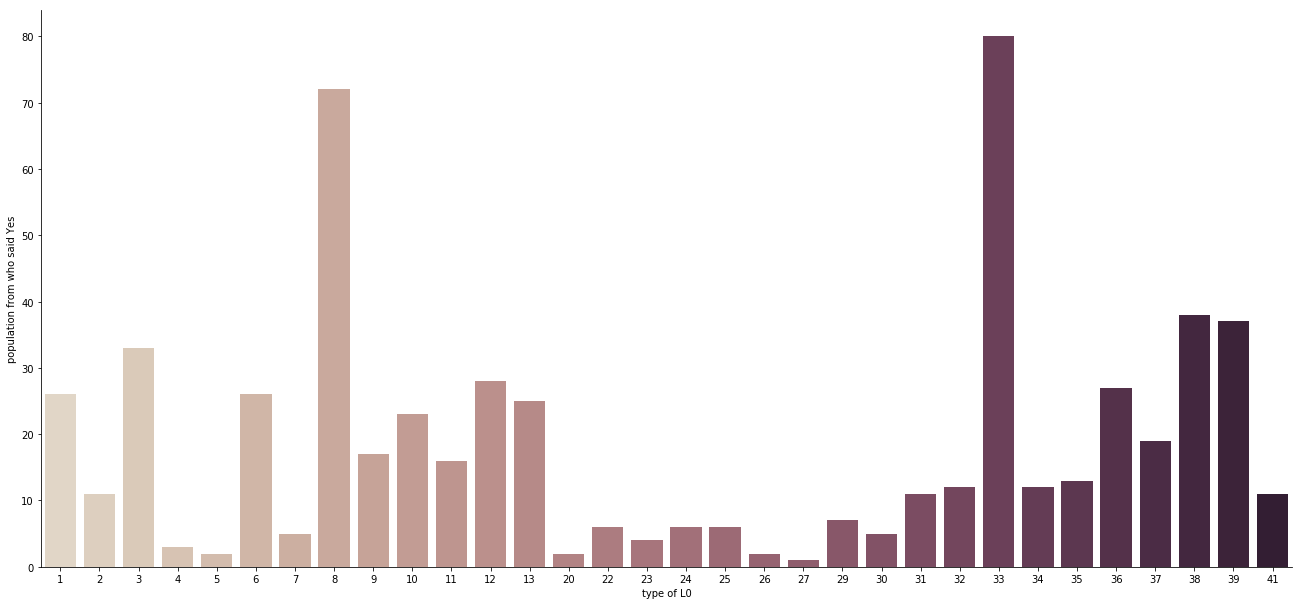

In [35]:
db=dataset.loc[dataset['CLASS']==1]
SD1=db.loc[:,"SD1"]
ax=sns.catplot(x=SD1.index, kind="count", palette="ch:.25", data=SD1, height=9, aspect=2)
ax.set(xlabel='type of L0', ylabel='population from who said Yes')


The majority of people who have agreed about the insurance were medium class and lower class families


#### Purchased caravan policy vs age's classes

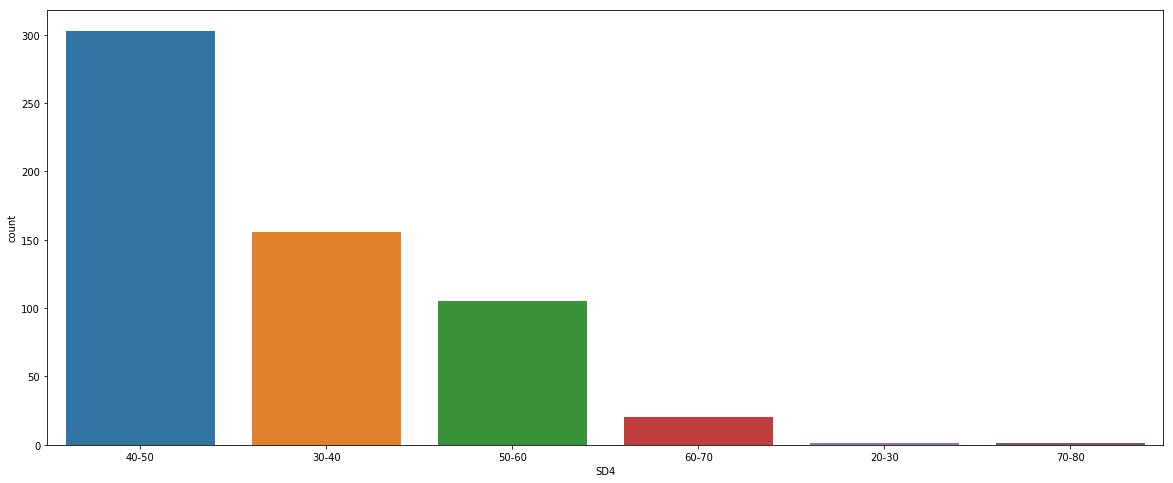

In [36]:
age_classes = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
purchased = dataset.loc[dataset["CLASS"] == 1, "SD4"]
purchased = purchased.apply(lambda x : age_classes[x-1])
#print(purchased)
plt.figure(figsize=(20,8))
ax = sns.countplot(x=purchased.index, data=purchased);

It's clear that people between the age of 30 and 50 represent the majority of caravan's policy holders.

#### Purchased caravan policy vs work

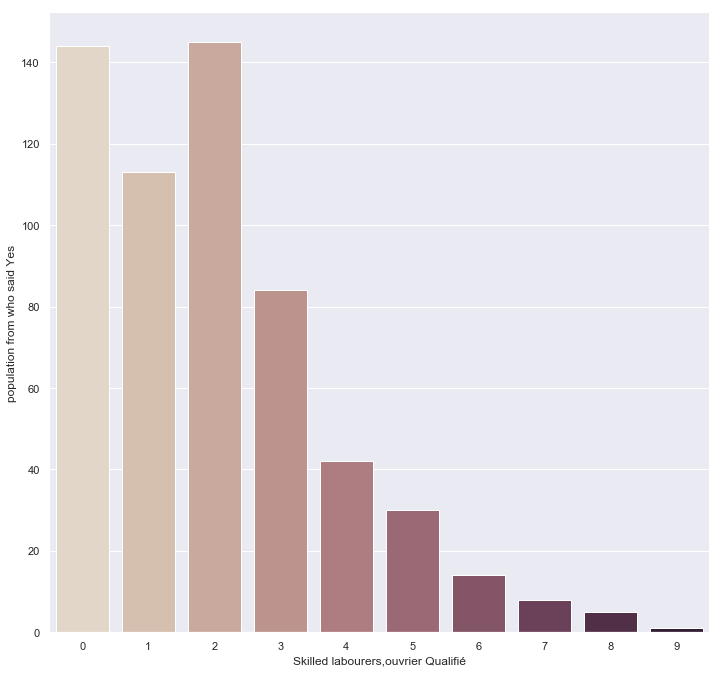

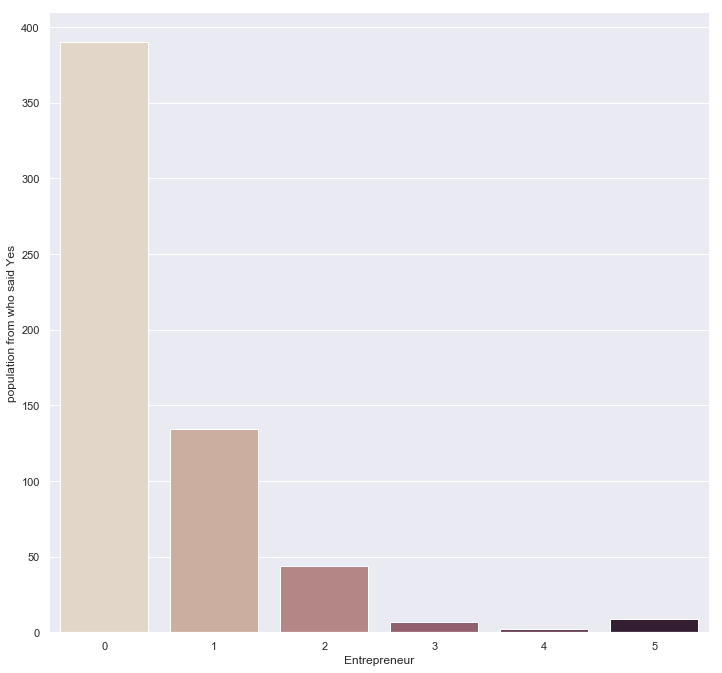

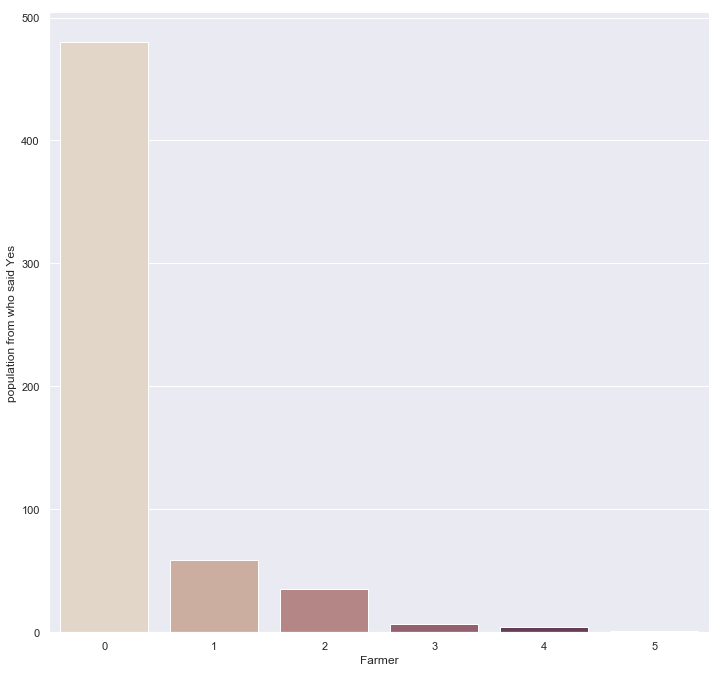

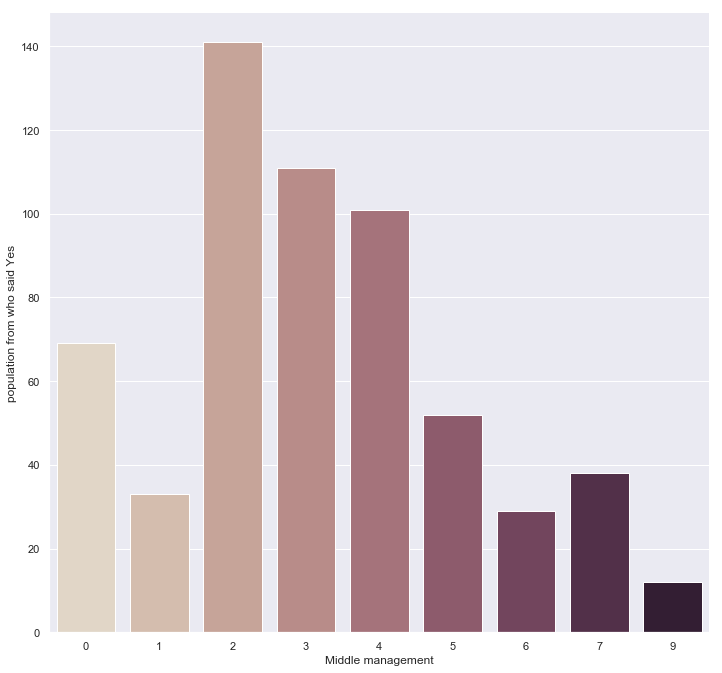

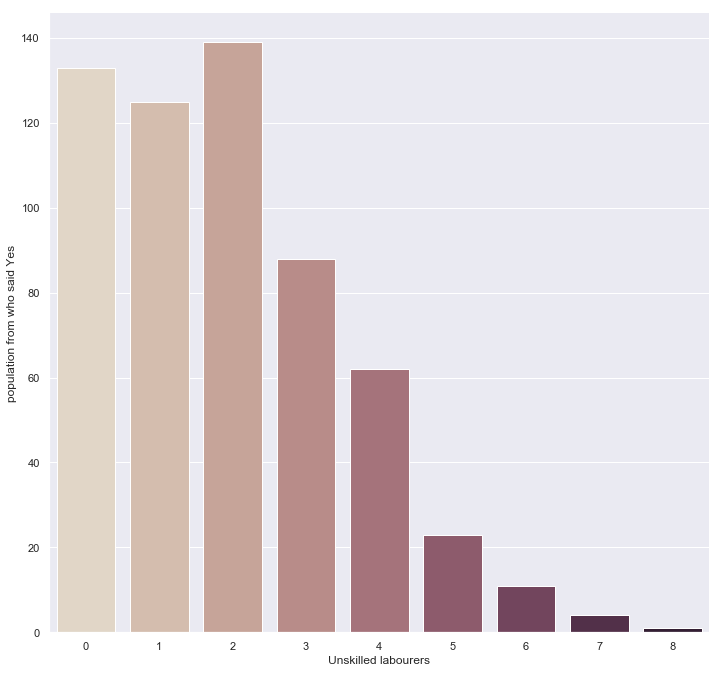

In [39]:
SD23=db.loc[:,"SD23"]
sns.set(style="darkgrid")
ax=sns.catplot(x=SD23.index, kind="count", palette="ch:.25", data=SD23,height=10);
ax.set(xlabel='Skilled labourers,ouvrier Qualifié', ylabel='population from who said Yes')
plt.show()

SD20=db.loc[:,"SD20"]
sns.set(style="darkgrid")
ax=sns.catplot(x=SD20.index, kind="count", palette="ch:.25", data=SD20,height=10);
ax.set(xlabel='Entrepreneur', ylabel='population from who said Yes')
plt.show()
SD21=db.loc[:,"SD21"]
sns.set(style="darkgrid")
ax=sns.catplot(x=SD21.index, kind="count", palette="ch:.25", data=SD21,height=10);
ax.set(xlabel='Farmer', ylabel='population from who said Yes')
plt.show()
SD22=db.loc[:,"SD22"]
sns.set(style="darkgrid")
ax=sns.catplot(x=SD22.index, kind="count", palette="ch:.25", data=SD22,height=10);
ax.set(xlabel='Middle management', ylabel='population from who said Yes')
plt.show()
SD24=db.loc[:,"SD24"]
sns.set(style="darkgrid")
ax=sns.catplot(x=SD24.index, kind="count", palette="ch:.25", data=SD24,height=10);
ax.set(xlabel='Unskilled labourers', ylabel='population from who said Yes')
plt.show()


we can see that the majority of labours are qualified (less than 36% of unskilled labourers) with less than 20% entreprenors , and most of them live in the city ( since they are not farmers ),less than 50% are unskilled labourers



#### Purchased caravan policy vs education level


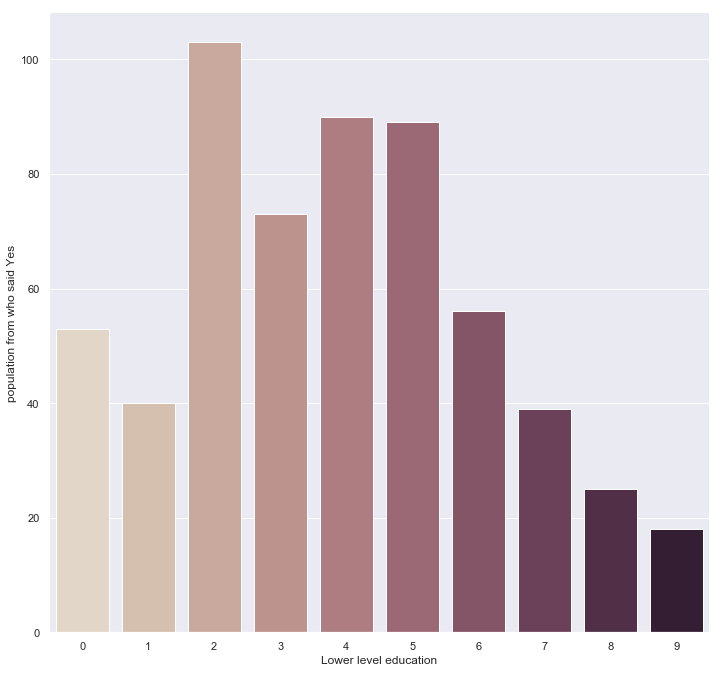

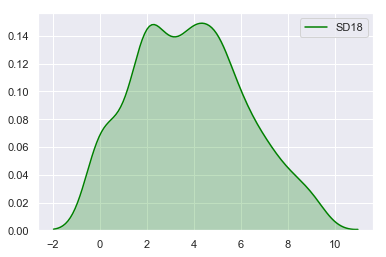

In [40]:
SD18=db.loc[:,"SD18"]
sns.set(style="darkgrid")
ax=sns.catplot(x=SD18.index, kind="count", palette="ch:.25", data=SD18,height=10);
ax.set(xlabel='Lower level education', ylabel='population from who said Yes')
plt.show()
ax=sns.kdeplot(SD18,shade=True,color="green")

#### Purchased caravan policy vs average income

It seems that the avg income column describes the percentage of customers near the average income. So we will convert it into a real value of income using the variables "Income < 30.000", "Income 30-45.000"... which describe the percentage of people in a certain range of income.

In [41]:
def calc_average_income(df):
    #get income related features
    income = df.iloc[:, 36:41]

    #renaming columns
    income.columns=["<30.000", "30-45.000", "45-75.000", "75-122.000", ">123.000"]

    #dictionary of L3(percentage range) as key and average percentage in that range as value 
    percentage_avg = {0:0, 1:0.5, 2:0.17, 3:0.3, 4:0.43, 5:0.56, 6:0.69, 7:0.82, 8:0.94, 9:1}

    income_avg = [15000, 37500, 60000, 98500, 123000]
    
    #for each column(income range) we get the average income value for the percentage of people in that range
    i = 0
    for col in income.columns.values:
        income[col] = income[col].apply(lambda x : percentage_avg[x])
        income[col] *= income_avg[i]
        i += 1
    
    #sum of average income values to get the total average income value
    income["Average Income"] = income.sum(axis = 1)
    return income["Average Income"]

In [42]:
#train["SD42"] = calc_average_income(train)
#test["SD42"] = calc_average_income(test)
dataset['SD42'] = calc_average_income(dataset)

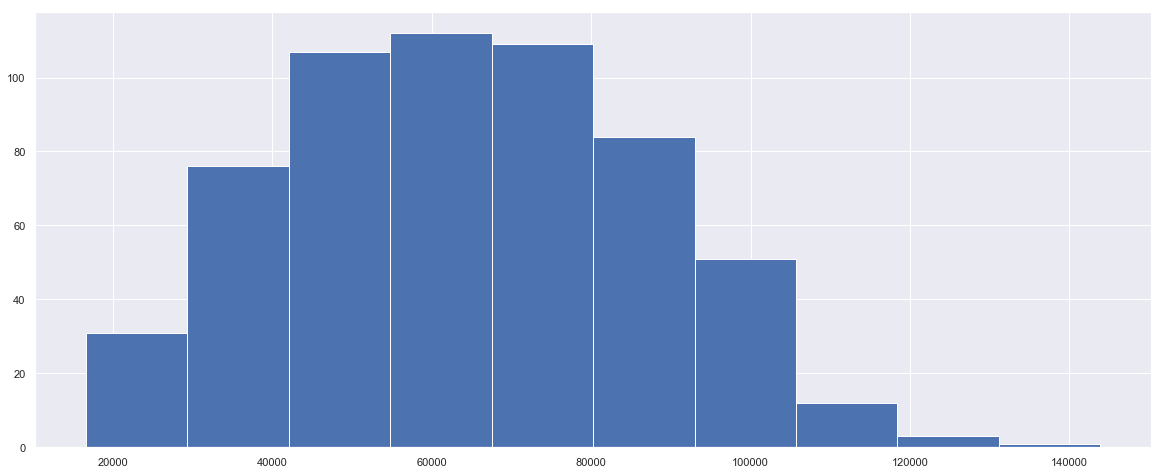

In [43]:
plt.figure(figsize=(20,8))
plt.hist(x = dataset[dataset["CLASS"] == 1]["SD42"]);


In the above graph, we come to know that middle income customers with income ranging from 35000 to 60000 are more likely to have a caravan policy than those with a really high income.

#### Purchased caravan policy vs No car feature

In [44]:
dataset['SD34'].head()

0    1
1    2
2    2
3    0
4    1
Name: SD34, dtype: int64

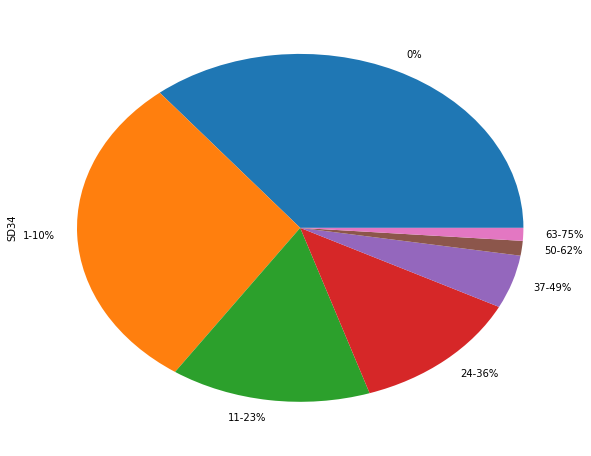

In [50]:

plt.figure(figsize=(10,8))
pourc = ['0%', '1-10%', '11-23%', '24-36%', '37-49%', '50-62%', '63-75%', '76-88%', '89-99%', '100%']
dataset[dataset['CLASS'] == 1]['SD34'].value_counts().plot(kind = 'pie', labels=pourc);

The most caravan assurance policy holders live in areas where the majority of people have cars.

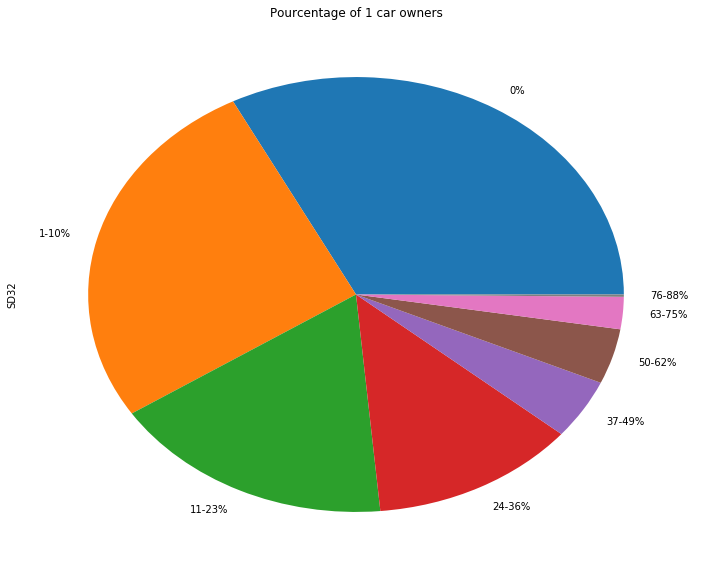

In [52]:
plt.figure(figsize=(12, 10))
pourc = ['0%', '1-10%', '11-23%', '24-36%', '37-49%', '50-62%', '63-75%', '76-88%', '89-99%', '100%']
dataset[dataset['CLASS'] == 1]['SD32'].value_counts().plot(kind = 'pie', labels=pourc, 
                                                              title="Pourcentage of 1 car owners");

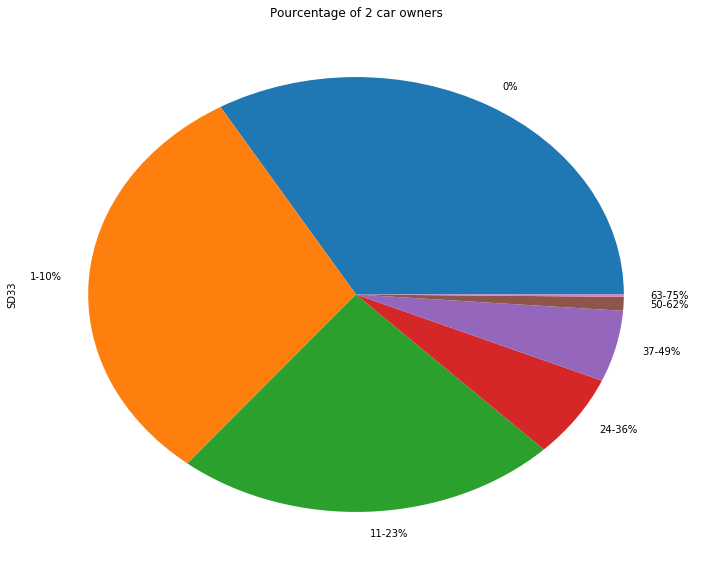

In [54]:
plt.figure(figsize=(12, 10))
pourc = ['0%', '1-10%', '11-23%', '24-36%', '37-49%', '50-62%', '63-75%', '76-88%', '89-99%', '100%']
dataset[dataset['CLASS'] == 1]['SD33'].value_counts().plot(kind = 'pie', labels=pourc, 
                                                               title="Pourcentage of 2 car owners");

The most caravan assurance policy holders live in areas where the majority of people have cars.

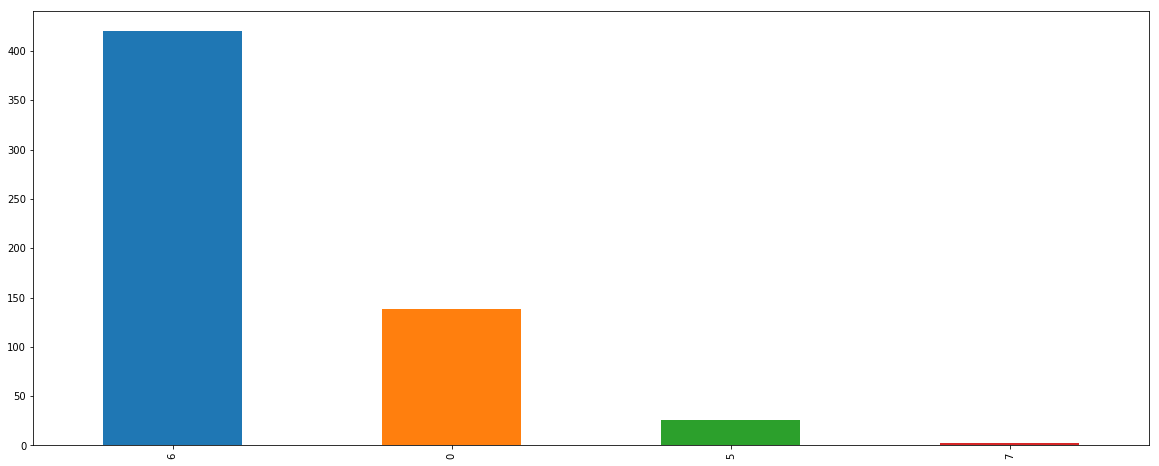

In [55]:
plt.figure(figsize=(20, 8))
dataset[dataset['CLASS'] == 1]['PO47'].value_counts().plot(kind = "bar");

1000 – 4999

### Exploring proprietary variables


### contribution car policy 

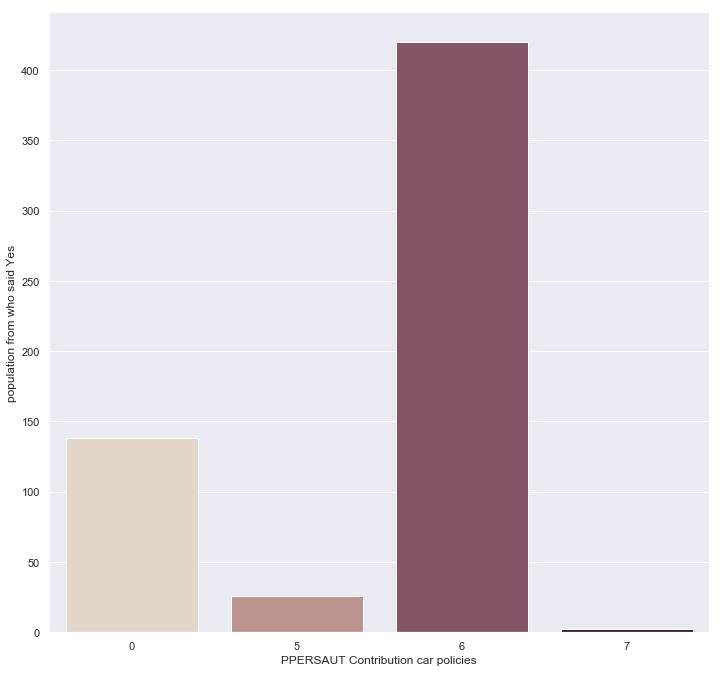

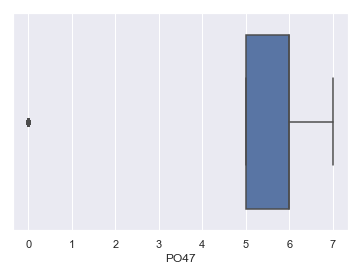

In [45]:
PO47=db.loc[:,"PO47"]
sns.set(style="darkgrid")
ax=sns.catplot(x=PO47.index, kind="count", palette="ch:.25", data=PO47,height=10);
ax.set(xlabel='PPERSAUT Contribution car policies', ylabel='population from who said Yes')
plt.show()
sns.boxplot(PO47)

### the population who said yes where who contributed the most at car policies


## Conclusion : 
#### the profil who are considered to have the profile to accept the insurance offer are the ones who are good workers, live in the city of course(where majority of people have cars) , are a part of the middle or the low class with a large family and contribute to car policies , we can see that are more likely to have a caravan policy than ritch people.the Age of custumors who are more likely to accept the offer are between 30 and 50 years old.